In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.ion()

In [2]:
K=10
## structure de données:
# p_kd: dimensions (K, D) matrice de la proba p(k,d) que le pixel d soit allumé pour les images de classe k
# P_k : dimension  (K)    matrice des probas de classe: P(y_true == k) est la proba qu'une image prise au hasard soit de classe k.


## Version de MNIST (très) réduite

In [3]:
######### les données ################
import sklearn.datasets
X,y = sklearn.datasets.load_digits(n_class=K, return_X_y=True)
Dlin=8

## Version de MNIST plus grande : 

In [45]:
# Tapez dans un terminal (dans le meme dossier que le dossier courant ou se trouve ce notebook):
# wget https://gitlab.inria.fr/flandes/data-for-teaching/-/blob/master/mnist70.npz
# 
data = np.load('./mnist70.npz', 'X', 'y')
X = data['X']
y = data['y']
print(X.shape)
Dlin=28

(70000, 784)


(array([45310977.,   665865.,   598713.,   510161.,   520494.,   587726.,
          547271.,   604551.,   712869.,  4821373.]),
 array([0.        , 0.09960938, 0.19921875, 0.29882812, 0.3984375 ,
        0.49804688, 0.59765625, 0.69726562, 0.796875  , 0.89648438,
        0.99609375]),
 <BarContainer object of 10 artists>)

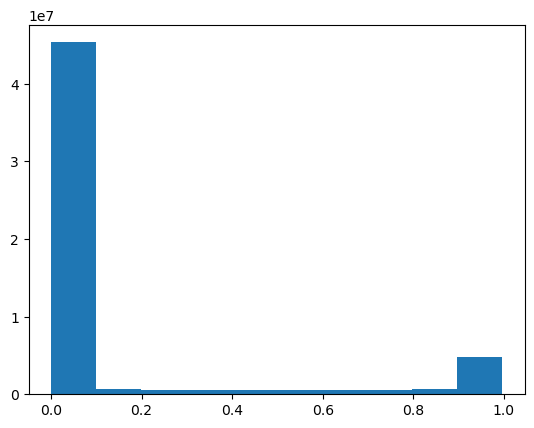

In [46]:
plt.hist( X.flatten())

Text(0.5, 1.0, 'ceci est censé ressembler à un 5 avant la binarisation')

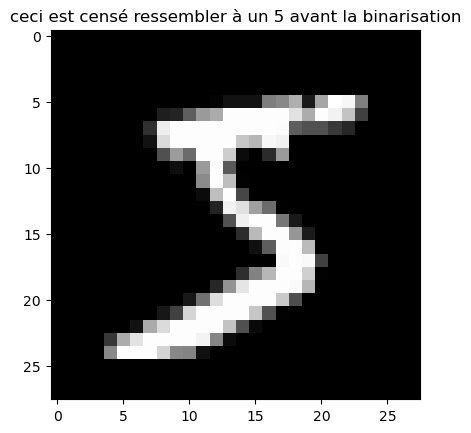

In [47]:
######################################
## petite demo d'affichage ##
plt.figure()
n=0 # image numero n
plt.imshow(X[n].reshape(Dlin,Dlin) , cm.gray)
plt.title("ceci est censé ressembler à un "+str(y[n])+ " avant la binarisation")
# plt.show() ## inutile si on a mis plt.in() au début #
#############################

In [48]:
X.min(), X.max(), 

(0.0, 0.99609375)

In [49]:
##################################################
#### preparation des donnees (pre processing) ####

# on met X (les intensités de niveaux de gris) entre 0 et 1
X /= X.max()

In [50]:
## on binarise X, de sorte que il vaut soit 0 soit 1,
## comme les valeurs prises par une loi de Bernoulli

seuil = 0.5


## dans le cas Gaussien, il n'est pas nécéssaire de binariser.
X.shape, (X > seuil).shape, 28**2

((70000, 784), (70000, 784), 784)

In [51]:
X[X > seuil] = 1
X[X < seuil] = 0

Text(0.5, 1.0, 'ceci est censé ressembler à un 5 avant la binarisation')

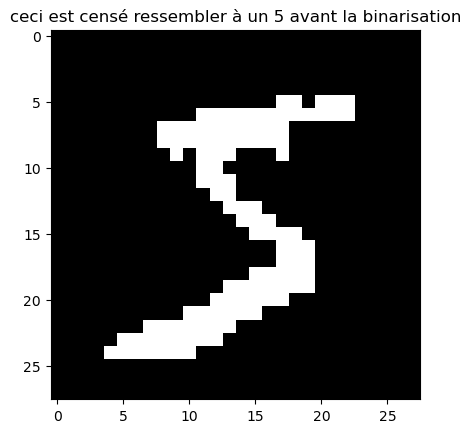

In [52]:
######################################
## petite demo d'affichage ##
plt.figure()
n=0 # image numero n
plt.imshow(X[n].reshape(Dlin,Dlin) , cm.gray)
plt.title("ceci est censé ressembler à un "+str(y[n])+ " avant la binarisation")
# plt.show() ## inutile si on a mis plt.in() au début #
#############################

Text(0.5, 1.0, 'ceci est censé ressembler à un 5 avant la binarisation')

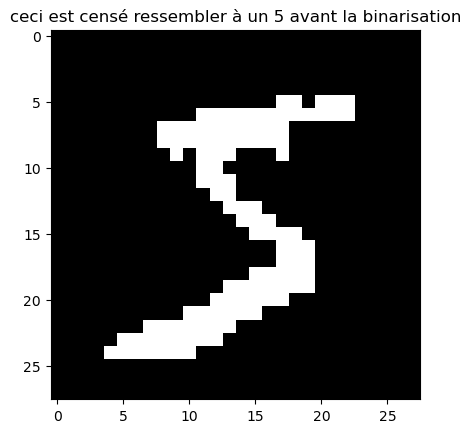

In [53]:
######################################
## petite demo d'affichage ##
plt.figure()
n=0 # image numero n
plt.imshow(X[n].reshape(Dlin,Dlin) , cm.gray)
plt.title("ceci est censé ressembler à un "+str(y[n])+ " avant la binarisation")
# plt.show() ## inutile si on a mis plt.in() au début #
#############################

In [54]:
X.shape, X.shape[0] 

((70000, 784), 70000)

In [55]:
5//2  ## division entière

2

In [56]:
a = np.random.random((4,3))
(a.flatten()).shape

(12,)

In [75]:
## separation train/test (ici, il n'y a pas d'hyperparametres, pratiquement, donc on ne fait pas de validation)
## quoique... il y en a au moins un, lequel ?
## TODO:
Ntot   = X.shape[0]      #Ntotal
Ntrain = int( X.shape[0]*0.8 )## TODO 
# Ntest  = ## TODO 

X_train = X[0: Ntrain]
X_test  = X[Ntrain:Ntot] # X[-Ntest:] est equivalent
y_train = y[0:Ntrain]
y_test  = y[Ntrain:Ntot]

print("X.shape", X.shape)
del X
del y

X.shape (70000, 784)


In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

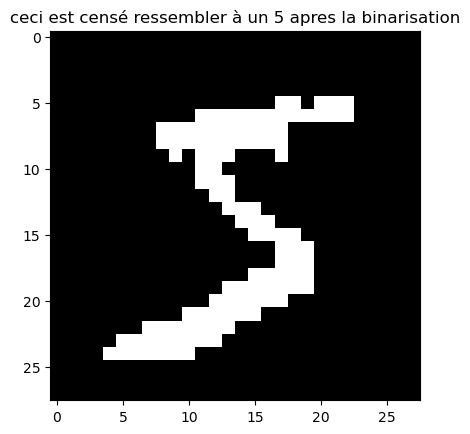

In [59]:
#############################
## petite demo d'affichage ##
plt.figure()
n=0 # image numero 42
plt.imshow(X_train[n].reshape(Dlin,Dlin) , cm.gray)
plt.title("ceci est censé ressembler à un "+str(y_train[n])+" apres la binarisation")
plt.show()
#############################

In [78]:
y = y_train
X = X_train

In [79]:
y


array([5, 0, 4, ..., 2, 3, 3])

In [80]:
y==5

array([ True, False, False, ..., False, False, False])

In [81]:
(y==5).sum()

5060

In [82]:
y[y==5].shape

(5060,)

In [83]:
X[y==5].shape

(5060, 784)

In [84]:
np.unique(y[y==5])

array([5])

In [89]:
D = X.shape[1]
D

784

In [91]:
k = 5

p_kd = np.zeros( (K,D))
P_k = np.zeros( K)

In [119]:
# p_kd[k] 
y.shape

(56000,)

In [123]:
y, y[1:4]

(array([5, 0, 4, ..., 2, 3, 3]), array([0, 4, 1]))

In [127]:
y == 3

array([False, False, False, ..., False,  True,  True])

In [128]:
X[y == 3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [106]:
a = (X[y==k].mean(axis=0))

In [108]:
b = (X[y==k].sum(axis=0)/ (y==k).sum() )
abs(a-b).sum()

0.0

In [110]:
p_kd[k].shape,  (X[y==k].mean(axis=0)).shape

((784,), (784,))

In [113]:
p_kd[k] =  (X[y==k].mean(axis=0))
p_kd[k]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [137]:
a = np.random.randint(1,10,(3,4))
a, 

(array([[1, 4, 6, 4],
        [9, 9, 1, 9],
        [9, 5, 6, 2]]),)

In [138]:
np.sum(a, axis=0)

array([19, 18, 13, 15])

In [139]:
np.sum(a, axis=1)

array([15, 28, 22])

In [151]:
((y==k)).sum()/X.shape[0]

0.09035714285714286

In [178]:
(y==k).shape, (y==k).sum()

((56000,), 5060)

In [150]:
np.mean(y==k)

0.09035714285714286

In [175]:
## l'algo d'apprentissage ##
def BayesienNaif_fit(X,y):
    N = X.shape[0]
    D = X.shape[1]
    p_kd = np.zeros( (K,D))
    P_k = np.zeros(K, dtype=float)
    for k in range(K):
        p_kd[k] =  (X[y==k].mean(axis=0))
        P_k[k] = np.mean(y==k)
        P_k[k] = np.mean((y==k *1.0))
   
    ## devrait retourner les parametres du modele (appris)
    return p_kd, P_k


In [176]:
p_kd, P_k = BayesienNaif_fit(X_train,y_train)
P_k

array([0.09875   , 0.11264286, 0.09928571, 0.10228571, 0.09728571,
       0.09035714, 0.098875  , 0.10375   , 0.0975    , 0.09926786])

In [154]:
EPS=10**-8


In [196]:
Probak = np.zeros(K)
# Probak[k] = 
d=23
N=X.shape[0]
res = np.zeros(N)
for d in range(D):
    res += (X[:,d]*np.log(p_kd[k,d]+EPS))

In [198]:
res2 = X[:,:]@np.log(p_kd[k,:]+EPS)

In [199]:
(res-res2)

array([ 8.99933070e-08, -6.88445596e-07,  1.43726425e-07, ...,
        4.26001804e-07, -2.47774778e-08, -5.46735919e-08])

In [200]:
(1-X)@np.log(1-p_kd[k]+EPS)

array([ -72.16894799,  -70.73121585, -109.14824736, ...,  -84.551007  ,
        -80.26077047,  -55.68865653])

In [202]:
a = X[:,:]@np.log(p_kd[k,:]+EPS) + (1-X)@np.log(1-p_kd[k]+EPS) + P_k[k]
a.shape

(56000,)

In [207]:
    Probak = np.zeros((X.shape[0],K))
    for k in range(K):
        Probak[:, k] = X[:,:]@np.log(p_kd[k,:]+EPS) \
                    + (1-X)@np.log(1-p_kd[k]+EPS) \
                    + P_k[k]

In [212]:
np.argmax(Probak)

407141

In [216]:
np.argmax(Probak, axis=1)

array([5, 0, 4, ..., 2, 3, 3])

In [222]:
## la fonction de dećision (a parametres fixés) ##
def BayesienNaif_predict(X,p_kd, P_k):
    Probak = np.zeros((X.shape[0],K))
    for k in range(K):
        Probak[:,k] = X[:,:]@np.log(p_kd[k,:]+EPS) \
                    + (1-X)@np.log(1-p_kd[k]+EPS) \
                    + np.log(P_k[k])
    ypred = np.argmax(Probak, axis=1)
    return ypred # devrait retourner les labels des images

In [223]:
ypred = BayesienNaif_predict(X_train ,p_kd, P_k)
## TODO: tester


## Affichage des scores (et matrice de confusion)

In [ ]:
print("matrice de confusion: TODO - INDICE: lire la doc de sklearn.metrics / puis le faire avec sklearn ou a la main")



In [ ]:

print("accuracy score (train, et test): TODO -INDICE:  lire la doc de sklearn.metrics / puis le faire avec sklearn ou a la main (c'est facile)")


## Affichage des parametres:

In [ ]:
###############################
## affichage des parametres: ##

## TODO: afficher les parametres appris sous un format lisible par l'humain

plt.show()

###############################

# Bonus: on a un modèle génératif 

utilisez le modèle appris pour générer une image de la classe k=0, par exemple:

In [ ]:
## astuce: pour tirer au hasard 10 nombres d'apres une loi de Bernoulli 
## avec proba p, on peut faire:
p = 0.6
ma_va_de_bernoulli = np.random.random((10)) < p

ma_va_de_bernoulli

In [ ]:
## la feuille de brouillon:
k=0
imageGeneree =  ## TODO 
plt.imshow(imageGeneree.reshape(Dlin,Dlin))

#### Maintenant, on peut faire par exemple, 5 iamgs-exemples générées pour chacune des K classes:

In [ ]:
NmbreImageParClasse = 5
fig, axs = plt.subplots(K, NmbreImageParClasse, figsize=(10, 10))

for k in range(K):
    for iteration in range(NmbreImageParClasse):
        
        imageGeneree =  ## TODO 
        
        axs[k, iteration].imshow(imageGeneree.reshape(Dlin,Dlin))
# plt.tight_layout()
plt.show()

## Conclusion: ??

Est ce que vous voyez le problème de l'hypothèse "pixels indépendants" ?


## Bonus (difficile, ou plutot un peu long): 

Refaire l'entrainement avec pour modèle **une gaussienne avec une matrice de Covariance pleine et non diagonale.**

## conseil: 

**faire d'abord une PCA, car sinon le nombre de paramètres explose !!**